In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [28]:
N = 20

In [47]:
X = np.random.random(N)*10 - 5

In [48]:
Y = 0.5 * X - 1 + np.random.randn(N)

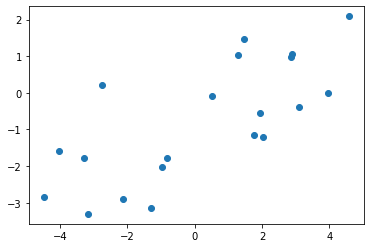

In [49]:
plt.scatter(X, Y);

In [50]:
# Model set up

model = nn.Linear(1, 1)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))


In [51]:
# Train the model

n_epochs = 30
losses = []

for it in range(n_epochs):
  optimizer.zero_grad()

  outputs = model(inputs)

  loss = criterion(outputs, inputs)

  losses.append(loss.item())

  loss.backward()

  optimizer.step()

  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')


Epoch 1/30, Loss: 1.0702
Epoch 2/30, Loss: 0.6168
Epoch 3/30, Loss: 0.3781
Epoch 4/30, Loss: 0.2381
Epoch 5/30, Loss: 0.1516
Epoch 6/30, Loss: 0.0970
Epoch 7/30, Loss: 0.0621
Epoch 8/30, Loss: 0.0398
Epoch 9/30, Loss: 0.0255
Epoch 10/30, Loss: 0.0164
Epoch 11/30, Loss: 0.0105
Epoch 12/30, Loss: 0.0067
Epoch 13/30, Loss: 0.0043
Epoch 14/30, Loss: 0.0028
Epoch 15/30, Loss: 0.0018
Epoch 16/30, Loss: 0.0011
Epoch 17/30, Loss: 0.0007
Epoch 18/30, Loss: 0.0005
Epoch 19/30, Loss: 0.0003
Epoch 20/30, Loss: 0.0002
Epoch 21/30, Loss: 0.0001
Epoch 22/30, Loss: 0.0001
Epoch 23/30, Loss: 0.0001
Epoch 24/30, Loss: 0.0000
Epoch 25/30, Loss: 0.0000
Epoch 26/30, Loss: 0.0000
Epoch 27/30, Loss: 0.0000
Epoch 28/30, Loss: 0.0000
Epoch 29/30, Loss: 0.0000
Epoch 30/30, Loss: 0.0000


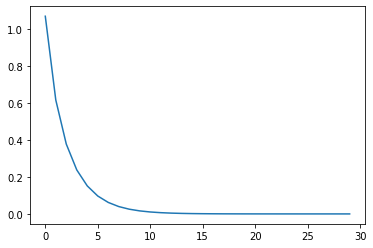

In [52]:
plt.plot(losses);

In [53]:
predicted = model(inputs).detach().numpy()

In [54]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()

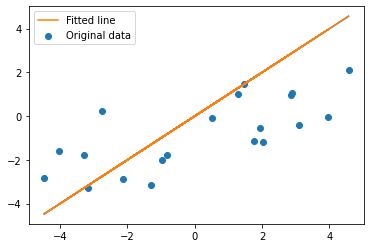

In [55]:
plt.scatter(X, Y, label='Original data')
plt.plot(X, w * X + b)
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()